In [1]:
import numpy as np 
import pandas as pd 

#for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import squarify

import geopandas as gpd
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import matplotlib.pyplot as plt

In [2]:
# reading in the dataset
data = pd.read_csv('Riverside_County_Crime_Reports_Improved.csv')

# check the shape of the data which tells us the columns and rows info 
data.shape

(169614, 10)

In [3]:
# checking the head of the data
data.head()

,caseNumber,reportDate,offenseDate,callTime,crimeType,premise,blockAddress,rd,npc,_id
0,P18228509,12/4/18,12/3/18,5:36AM,MOTOR VEH. THEFT: Autos,RESIDENTIAL,4700 BLOCK BEVERLY CT,E02,NORTH,185494
1,P18228497,12/4/18,12/4/18,3:45AM,ROBBERY: Strong-Arm,RESIDENTIAL,9300 BLOCK INDIANA AVE,I16,CENTRAL,185493
2,P18228495,12/4/18,12/4/18,3:38AM,VANDALISM: Vandalism,MISCELLANEOUS,3600 BLOCK NYE AVE,J12,WEST,185492
3,P18228490,12/4/18,12/4/18,3:30AM,OTHER: Motor Vehicle Codes,HIGHWAYS,GOLDEN AVE,H04,WEST,185491
4,P18228421,12/3/18,12/3/18,10:55PM,ASSAULT: Other Assaults,RESIDENTIAL,2500 BLOCK 14TH ST,D02,EAST,185490


In [4]:
# describing the data
data.describe()

,_id
count,169614.000000
mean,98365.951284
std,51868.397787
min,1.000000
25%,56986.250000
50%,99796.500000
75%,142750.750000
max,185494.000000


In [5]:
# checking for null values in our dataset
data.isnull().sum()

caseNumber        0
reportDate        0
offenseDate     123
callTime          0
crimeType         0
premise           0
blockAddress      0
rd                0
npc               4
_id               0
dtype: int64

In [6]:
# filling the missing value in offenseDate and npc (The Neighborhood Policing Center) using the mode values

data['offenseDate'].fillna(data['offenseDate'].mode()[0], inplace = True)
data['npc'].fillna(data['npc'].mode()[0], inplace = True)

data.isnull().any().any()

False

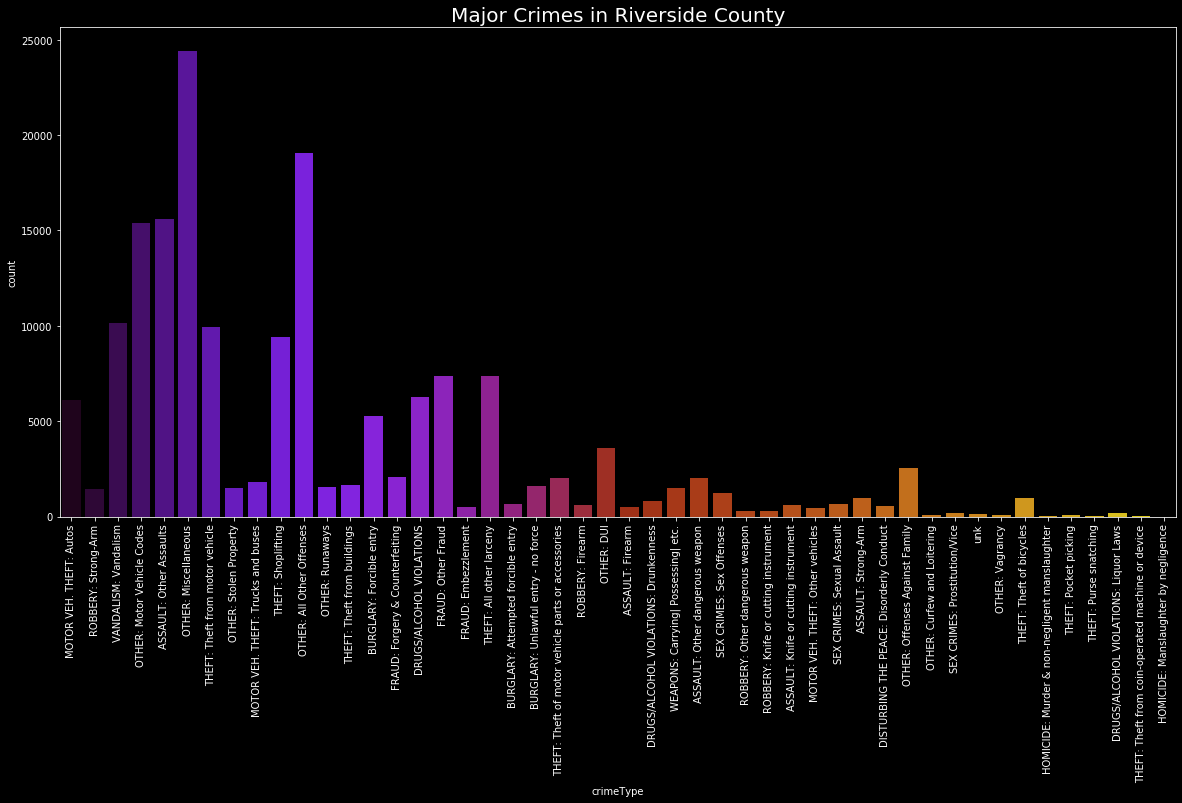

In [7]:
# visualizationing the data for different crime categories 

plt.rcParams['figure.figsize'] = (20, 9)
# plt.style.use('classic')
plt.style.use('dark_background')

sns.countplot(data['crimeType'], palette = 'gnuplot')

plt.title('Major Crimes in Riverside County', fontweight = 30, fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

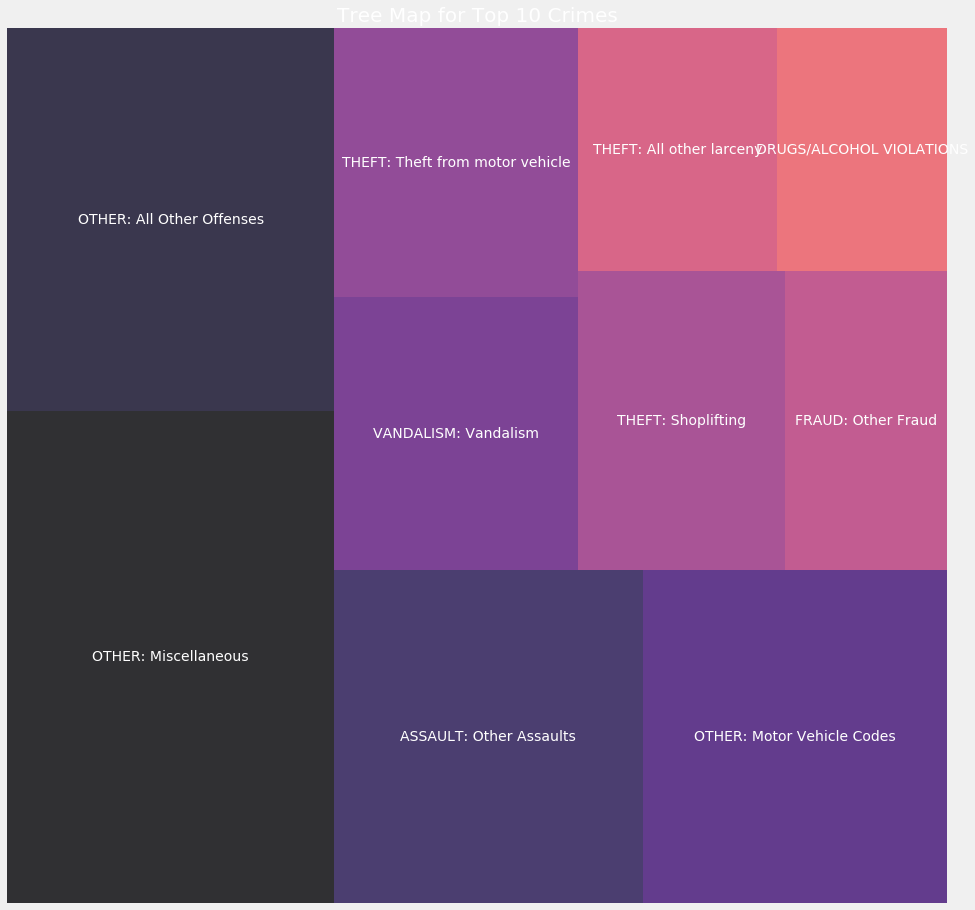

In [8]:
# plotting a tree map of the dataset 

y = data['crimeType'].value_counts().head(10)
    
plt.rcParams['figure.figsize'] = (15, 15)
plt.style.use('fivethirtyeight')

color = plt.cm.magma(np.linspace(0, 1, 15))
squarify.plot(sizes = y.values, label = y.index, alpha=.8, color = color)
plt.title('Tree Map for Top 10 Crimes', fontsize = 20)

plt.axis('off')
plt.show()

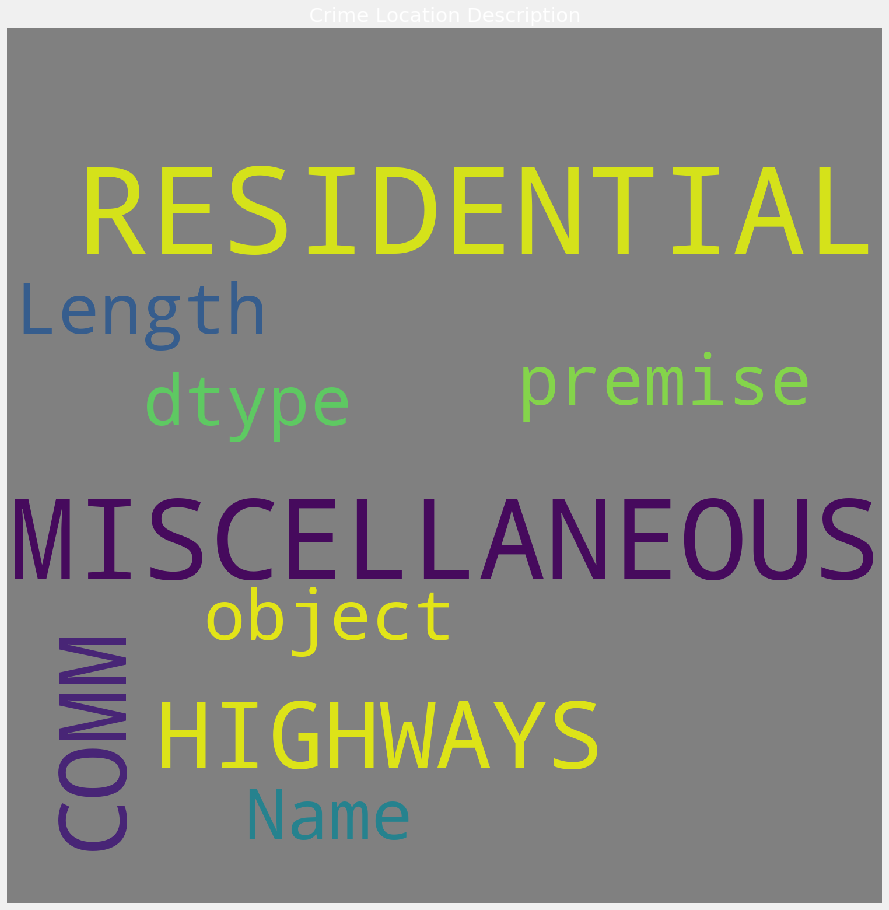

In [9]:
# description the location of each crime

from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (15, 15)
plt.style.use('fast')

wc = WordCloud(background_color = 'grey', width = 1500, height = 1500).generate(str(data['premise']))
plt.title('Crime Location Description', fontsize = 20)

plt.imshow(wc)
plt.axis('off')
plt.show()

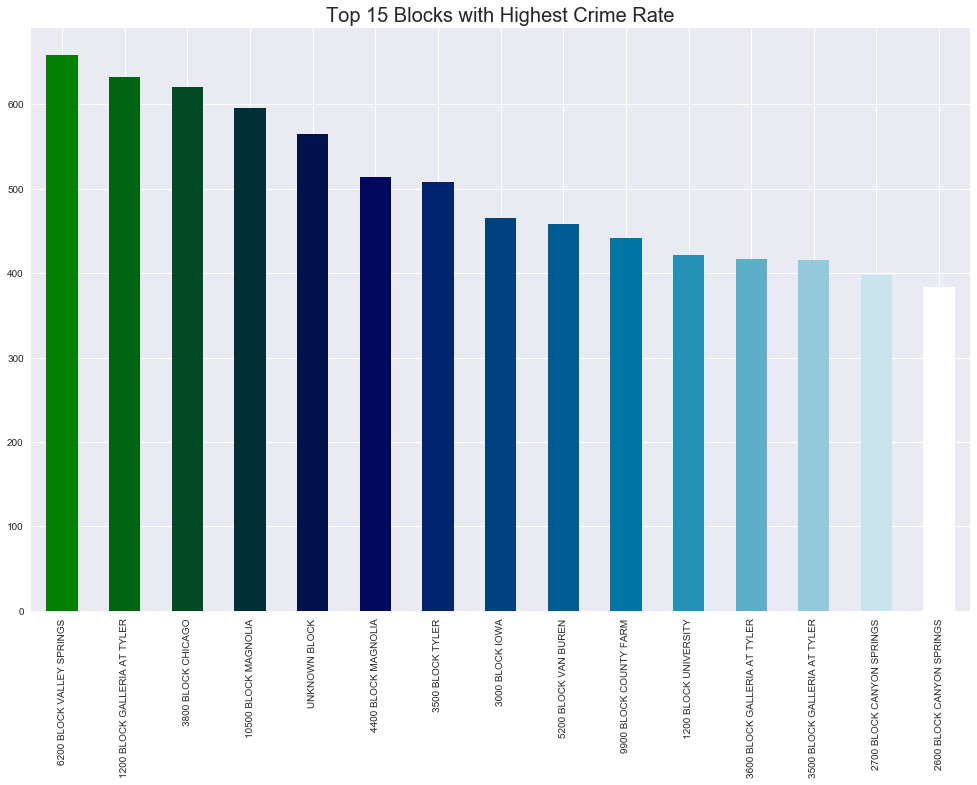

In [10]:
# Region count with highest crime addresses  

plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('seaborn')

color = plt.cm.ocean(np.linspace(0, 1, 15))
data['blockAddress'].value_counts().head(15).plot.bar(color = color, figsize = (15, 10))

plt.title('Top 15 Blocks with Highest Crime Rate',fontsize = 20)

plt.xticks(rotation = 90)
plt.show()

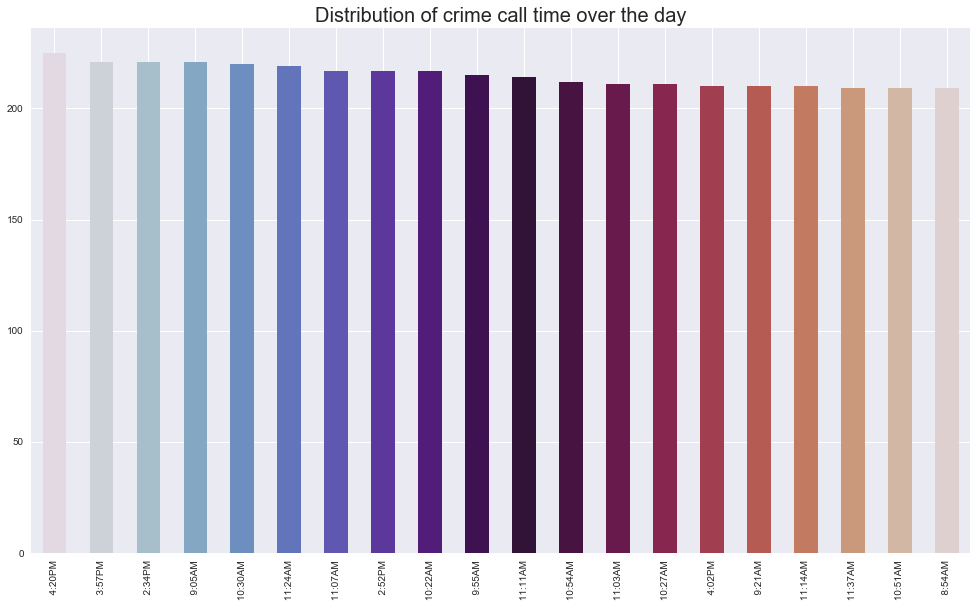

In [11]:
# visualizationing the crime report call time  

import warnings
warnings.filterwarnings('ignore')

color = plt.cm.twilight(np.linspace(0, 5, 100))
data['callTime'].value_counts().head(20).plot.bar(color = color, figsize = (15, 9))

plt.title('Distribution of crime call time over the day', fontsize = 20)
plt.show()

In [12]:
t = data.npc.value_counts()

table = pd.DataFrame(data=t.values, index=t.index, columns=['District Count'])
table = table.reindex(["NORTH", "CENTRAL", "WEST", "EAST"])

table = table.reset_index()
table.rename({'index': 'Neighborhood Policing Center'}, axis='columns', inplace=True)

table

,Neighborhood Policing Center,District Count
0,NORTH,45417
1,CENTRAL,33385
2,WEST,45496
3,EAST,41485


In [13]:
#riverside county DD Coordinates 33.95, -117.39
# riverside_map = folium.Map(location = [33.95, -117.39], zoom_start = 11)

# testing the smaller size data for choropleth map  
df = pd.read_csv('Riverside_County_Crime_Reports_Sample_Data.csv')
df.head()

,caseNumber,reportDate,offenseDate,callTime,crimeType,premise,blockAddress,rd,npc,_id
0,P18228509,12/4/18,12/3/18,5:36AM,MOTOR VEH. THEFT: Autos,RESIDENTIAL,4700 BLOCK BEVERLY CT,E02,NORTH,185494.0
1,P18228497,12/4/18,12/4/18,3:45AM,ROBBERY: Strong-Arm,RESIDENTIAL,9300 BLOCK INDIANA AVE,I16,CENTRAL,185493.0
2,P18228495,12/4/18,12/4/18,3:38AM,VANDALISM: Vandalism,MISCELLANEOUS,3600 BLOCK NYE AVE,J12,WEST,185492.0
3,P18228490,12/4/18,12/4/18,3:30AM,OTHER: Motor Vehicle Codes,HIGHWAYS,GOLDEN AVE,H04,WEST,185491.0
4,P18228421,12/3/18,12/3/18,10:55PM,ASSAULT: Other Assaults,RESIDENTIAL,2500 BLOCK 14TH ST,D02,EAST,185490.0


In [14]:
# retrieves the latitude and longitude of riverside 
locator = Nominatim(user_agent='myGeocoder') # holds the Geocoding service, Nominatim
location = locator.geocode('Riverside, California, United States')

print(location.address)
print('Latitude = {}, Longitude = {}'.format(location.latitude, location.longitude))

Riverside, Riverside County, California, United States of America
Latitude = 33.9533546, Longitude = -117.3961623


In [15]:
# Convert physical blockAddress to full address and adds it to new column 
df['FULL_ADDRESS'] = df['blockAddress'].astype(str) +',' + ' Riverside' + ',' + ' California'   

df.head()

,caseNumber,reportDate,offenseDate,callTime,crimeType,premise,blockAddress,rd,npc,_id,FULL_ADDRESS
0,P18228509,12/4/18,12/3/18,5:36AM,MOTOR VEH. THEFT: Autos,RESIDENTIAL,4700 BLOCK BEVERLY CT,E02,NORTH,185494.0,"4700 BLOCK BEVERLY CT , Riverside, California"
1,P18228497,12/4/18,12/4/18,3:45AM,ROBBERY: Strong-Arm,RESIDENTIAL,9300 BLOCK INDIANA AVE,I16,CENTRAL,185493.0,"9300 BLOCK INDIANA AVE , Riverside, California"
2,P18228495,12/4/18,12/4/18,3:38AM,VANDALISM: Vandalism,MISCELLANEOUS,3600 BLOCK NYE AVE,J12,WEST,185492.0,"3600 BLOCK NYE AVE , Riverside, California"
3,P18228490,12/4/18,12/4/18,3:30AM,OTHER: Motor Vehicle Codes,HIGHWAYS,GOLDEN AVE,H04,WEST,185491.0,"GOLDEN AVE, Riverside, California"
4,P18228421,12/3/18,12/3/18,10:55PM,ASSAULT: Other Assaults,RESIDENTIAL,2500 BLOCK 14TH ST,D02,EAST,185490.0,"2500 BLOCK 14TH ST , Riverside, California"


In [16]:
from opencage.geocoder import OpenCageGeocode

# the api key 
key = '8acf5244124d4fef9bf6fa8c387d84a2'
geocoder = OpenCageGeocode(key)
query = 'California, United States'  
results = geocoder.geocode(query)
print (results)


[{'annotations': {'DMS': {'lat': "36° 42' 5.26716'' N", 'lng': "118° 45' 21.59064'' W"}, 'FIPS': {'state': '06'}, 'MGRS': '11SLA4314263192', 'Maidenhead': 'DM06oq98gi', 'Mercator': {'x': -13219857.159, 'y': 4372037.44}, 'OSM': {'edit_url': 'https://www.openstreetmap.org/edit?relation=165475#map=17/36.70146/-118.75600', 'note_url': 'https://www.openstreetmap.org/note/new#map=17/36.70146/-118.75600&layers=N', 'url': 'https://www.openstreetmap.org/?mlat=36.70146&mlon=-118.75600#map=17/36.70146/-118.75600'}, 'UN_M49': {'regions': {'AMERICAS': '019', 'NORTHERN_AMERICA': '021', 'US': '840', 'WORLD': '001'}, 'statistical_groupings': ['MEDC']}, 'callingcode': 1, 'currency': {'alternate_symbols': ['US$'], 'decimal_mark': '.', 'disambiguate_symbol': 'US$', 'html_entity': '$', 'iso_code': 'USD', 'iso_numeric': '840', 'name': 'United States Dollar', 'smallest_denomination': 1, 'subunit': 'Cent', 'subunit_to_unit': 100, 'symbol': '$', 'symbol_first': 1, 'thousands_separator': ','}, 'flag': '🇺🇸', 'g

In [17]:
lat = results[0]['geometry']['lat']
lng = results[0]['geometry']['lng']

print (lat, lng)

36.7014631 -118.7559974


In [18]:
# convert fullAddress columns into geographical location - latitude and longitude 
list_lat = []  
list_long = []

# iterate over rows in dataset
for index, row in df.iterrows():

    address = row['FULL_ADDRESS']     
    query = str(address)
                  
    results = geocoder.geocode(query)   
    lat = results[0]['geometry']['lat']
    long = results[0]['geometry']['lng']
    
    list_lat.append(lat)
    list_long.append(long)
    
# create new columns from lists    
df['latitude'] = list_lat   
df['longitude'] = list_long

In [19]:
# verify that the latitude and longitude columns are added to our dataset
df.head()

,caseNumber,reportDate,offenseDate,callTime,crimeType,premise,blockAddress,rd,npc,_id,FULL_ADDRESS,latitude,longitude
0,P18228509,12/4/18,12/3/18,5:36AM,MOTOR VEH. THEFT: Autos,RESIDENTIAL,4700 BLOCK BEVERLY CT,E02,NORTH,185494.0,"4700 BLOCK BEVERLY CT , Riverside, California",33.963869,-117.404088
1,P18228497,12/4/18,12/4/18,3:45AM,ROBBERY: Strong-Arm,RESIDENTIAL,9300 BLOCK INDIANA AVE,I16,CENTRAL,185493.0,"9300 BLOCK INDIANA AVE , Riverside, California",34.010536,-117.348991
2,P18228495,12/4/18,12/4/18,3:38AM,VANDALISM: Vandalism,MISCELLANEOUS,3600 BLOCK NYE AVE,J12,WEST,185492.0,"3600 BLOCK NYE AVE , Riverside, California",34.010536,-117.348991
3,P18228490,12/4/18,12/4/18,3:30AM,OTHER: Motor Vehicle Codes,HIGHWAYS,GOLDEN AVE,H04,WEST,185491.0,"GOLDEN AVE, Riverside, California",33.910756,-117.489046
4,P18228421,12/3/18,12/3/18,10:55PM,ASSAULT: Other Assaults,RESIDENTIAL,2500 BLOCK 14TH ST,D02,EAST,185490.0,"2500 BLOCK 14TH ST , Riverside, California",34.010536,-117.348991


In [20]:
# drop the following columns
df = df.drop(['callTime', 'crimeType', 'blockAddress', '_id'], axis=1)

In [21]:
# verify that the columns are dropped from our dataset 
df.head()

,caseNumber,reportDate,offenseDate,premise,rd,npc,FULL_ADDRESS,latitude,longitude
0,P18228509,12/4/18,12/3/18,RESIDENTIAL,E02,NORTH,"4700 BLOCK BEVERLY CT , Riverside, California",33.963869,-117.404088
1,P18228497,12/4/18,12/4/18,RESIDENTIAL,I16,CENTRAL,"9300 BLOCK INDIANA AVE , Riverside, California",34.010536,-117.348991
2,P18228495,12/4/18,12/4/18,MISCELLANEOUS,J12,WEST,"3600 BLOCK NYE AVE , Riverside, California",34.010536,-117.348991
3,P18228490,12/4/18,12/4/18,HIGHWAYS,H04,WEST,"GOLDEN AVE, Riverside, California",33.910756,-117.489046
4,P18228421,12/3/18,12/3/18,RESIDENTIAL,D02,EAST,"2500 BLOCK 14TH ST , Riverside, California",34.010536,-117.348991


In [22]:
# check if any of location columns are null 
df.latitude.isnull().sum()

0

In [23]:
# combined the latitude and longitude into a new column of location 
df['location'] = list(zip(df.latitude, df.longitude))

In [24]:
# verify that the new column has been added 
df.head()

,caseNumber,reportDate,offenseDate,premise,rd,npc,FULL_ADDRESS,latitude,longitude,location
0,P18228509,12/4/18,12/3/18,RESIDENTIAL,E02,NORTH,"4700 BLOCK BEVERLY CT , Riverside, California",33.963869,-117.404088,"(33.963869, -117.404088)"
1,P18228497,12/4/18,12/4/18,RESIDENTIAL,I16,CENTRAL,"9300 BLOCK INDIANA AVE , Riverside, California",34.010536,-117.348991,"(34.010536, -117.348991)"
2,P18228495,12/4/18,12/4/18,MISCELLANEOUS,J12,WEST,"3600 BLOCK NYE AVE , Riverside, California",34.010536,-117.348991,"(34.010536, -117.348991)"
3,P18228490,12/4/18,12/4/18,HIGHWAYS,H04,WEST,"GOLDEN AVE, Riverside, California",33.910756,-117.489046,"(33.9107558, -117.489046)"
4,P18228421,12/3/18,12/3/18,RESIDENTIAL,D02,EAST,"2500 BLOCK 14TH ST , Riverside, California",34.010536,-117.348991,"(34.010536, -117.348991)"


In [25]:
# create the new csv file with latitude and longitude columns added 
df.to_csv('Crime_Reports_Sample_Data_With_Geographics.csv')

In [26]:
# generates a circle marker map 

# create empty map zoomed in to riverside 
riv_map = folium.Map(
    location=[33.963869, -117.404088],
    tiles='CartoDB dark_matter',
    zoom_start=11,
)
df.apply(lambda row:folium.CircleMarker(location=[row["latitude"], row["longitude"]]).add_to(riv_map), axis=1)
riv_map


In [27]:
# another type of cluster map 
from folium import plugins
 
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()
    
riverside_map = folium.Map(location = [33.963869, -117.404088], zoom_start = 12)
 
# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(riverside_map)
 
# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(df.latitude, df.longitude, df.rd):
    folium.Marker(
        location=[lat, lng],
        icon=None,
#         popup=label,
).add_to(incidents)

# display map 
riverside_map
